# Predicting diamond prices based on the feature of diamonds.
## Phase 2: Statistical Modelling

#### Group Name: Group 57

#### Name(s) & ID(s) of Group Members:
- Eddie Ton (s3948609)
- Jabbar Baloghlan (s3890406)
- Tyler Xia (s3945694)
- Andy Than (s3947037)
- Huynh Pham (s3946066)

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

In Phase 1, we used the raw data from Kaggle (Shivam Agrawal, 2021) which contains various properties of diamonds based off of the Tiffany & Co's pricelist from 2017. With this data, we prepare it for analysis by normalising it and cleaning the data, including various data visualisations with the dataset in order to achieve our goal of finding the relation between a diamonds properties and its price. Phase 1 highlighted that clarity, cut and carat all seem to have a linear relationship towards the price of the diamonds; the better the clarity, cut and carat are, the higher the diamond is valued. In phase 2 we aim to predict the prices of diamonds through these variables.

### Report Overview

The report will focus on adopting the data acquired from the Phase 1, using it to create statistical models, and then commenting on the results. It will feature the main driving factors (variates with the biggest impact) to ultimately create models and come up with the best assumptions to predicting the price of a diamond.

### Overview of Methodology

We decided that the best option for our statistical modelling would be Multiple Linear Regression (MLR). This consists of making predictive equations for each of the variates that affect the price of a diamond. The expected outcome is to have an equation in the form of y = k + x1*bi1 + x2*bi2 ... + xn*bin, which can be used to predict diamond prices as closely to the real value as possible.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

We will be using all features present with a minor focus on color to determine the possibility of linear regression from the data.

#### Module Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import requests
import io

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# df = pd.read_csv('diamonds_no_outliers.csv')
# # df = pd.read_csv('diamonds.csv') # test

# name of the dataset to be imported from our GitHub account
df_name = 'diamonds_no_outliers.csv'
df_url = 'https://raw.githubusercontent.com/Jobi060704/math_files/main/' + df_name
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

#### Data preparation

Before we graph the full model overview, the categorical features will be label encoded as seen in the Phase 1 report. This is because these features have a distinct heirachy (eg. A 'Fair' cut is worse than an 'Ideal' cut). This was demonstrated in the data exploration of price and the features in Phase 1.

Other changes:
- The index column was an error that was added by accident in phase 2.

In [27]:
label_df = df.copy()
label_df = label_df.drop(['Unnamed: 0'], axis=1)

label_df.Clarity[label_df.Clarity == 'I1'] = 1
label_df.Clarity[label_df.Clarity == 'SI2'] = 2
label_df.Clarity[label_df.Clarity == 'SI1'] = 3
label_df.Clarity[label_df.Clarity == 'VS2'] = 4
label_df.Clarity[label_df.Clarity == 'VS1'] = 5
label_df.Clarity[label_df.Clarity == 'VVS2'] = 6
label_df.Clarity[label_df.Clarity == 'VVS1'] = 7
label_df.Clarity[label_df.Clarity == 'IF'] = 8

label_df.Cut[label_df.Cut == 'Fair'] = 1
label_df.Cut[label_df.Cut == 'Good'] = 2
label_df.Cut[label_df.Cut == 'Very Good'] = 3
label_df.Cut[label_df.Cut == 'Premium'] = 4
label_df.Cut[label_df.Cut == 'Ideal'] = 5

label_df.Color[label_df.Color == 'J'] = 1
label_df.Color[label_df.Color == 'I'] = 2
label_df.Color[label_df.Color == 'H'] = 3
label_df.Color[label_df.Color == 'G'] = 4
label_df.Color[label_df.Color == 'F'] = 5
label_df.Color[label_df.Color == 'E'] = 6
label_df.Color[label_df.Color == 'D'] = 7

label_df.head(10)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
5,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
6,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
7,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39
8,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73
9,0.23,5,1,5,62.8,56.0,340,3.93,3.90,2.46


### Feature Selection

To start, we need to create a base formula fitting for our model.

In [28]:
formula_string_indep_vars = ' + '.join(label_df.drop(columns='Price').columns)
formula_string = 'Price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  Price ~ Carat + Cut + Color + Clarity + Depth + Table + X + Y + Z


Now that we have defined our statistical model formula as a Python
string, we fit an OLS (ordinary least squares) model to our encoded
data.

In [29]:
model_full = sm.formula.ols(formula=formula_string, data=label_df)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:53:28   Log-Likelihood:            -4.0220e+05
No. Observations:               48436   AIC:                         8.044e+05
Df Residuals:                   48412   BIC:                         8.047e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4272.8267    758.053      5.637   

The full model has an adjusted R-squared value of 0.915, which means that 91% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant.

Now, we'll define a new dataframe for predicates and actuals. It will be used to make a scatterplot for residual observation.

In [30]:
residuals_full = pd.DataFrame({'actual': label_df['Price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.sample(10)

,actual,predicted,residual
24068,665,697.254522,-32.254522
43673,2006,2100.929207,-94.929207
14722,6468,5879.839107,588.160893
7555,4405,5092.756687,-687.756687
41998,1814,1904.100612,-90.100612
36386,499,714.982840,-215.982840
13533,5995,7173.449383,-1178.449383
40414,1656,1979.569611,-323.569611
40900,1698,1909.786111,-211.786111
36249,1168,1872.665158,-704.665158


Let's plot actual observations of price against the predicted values based on our previously written formula.

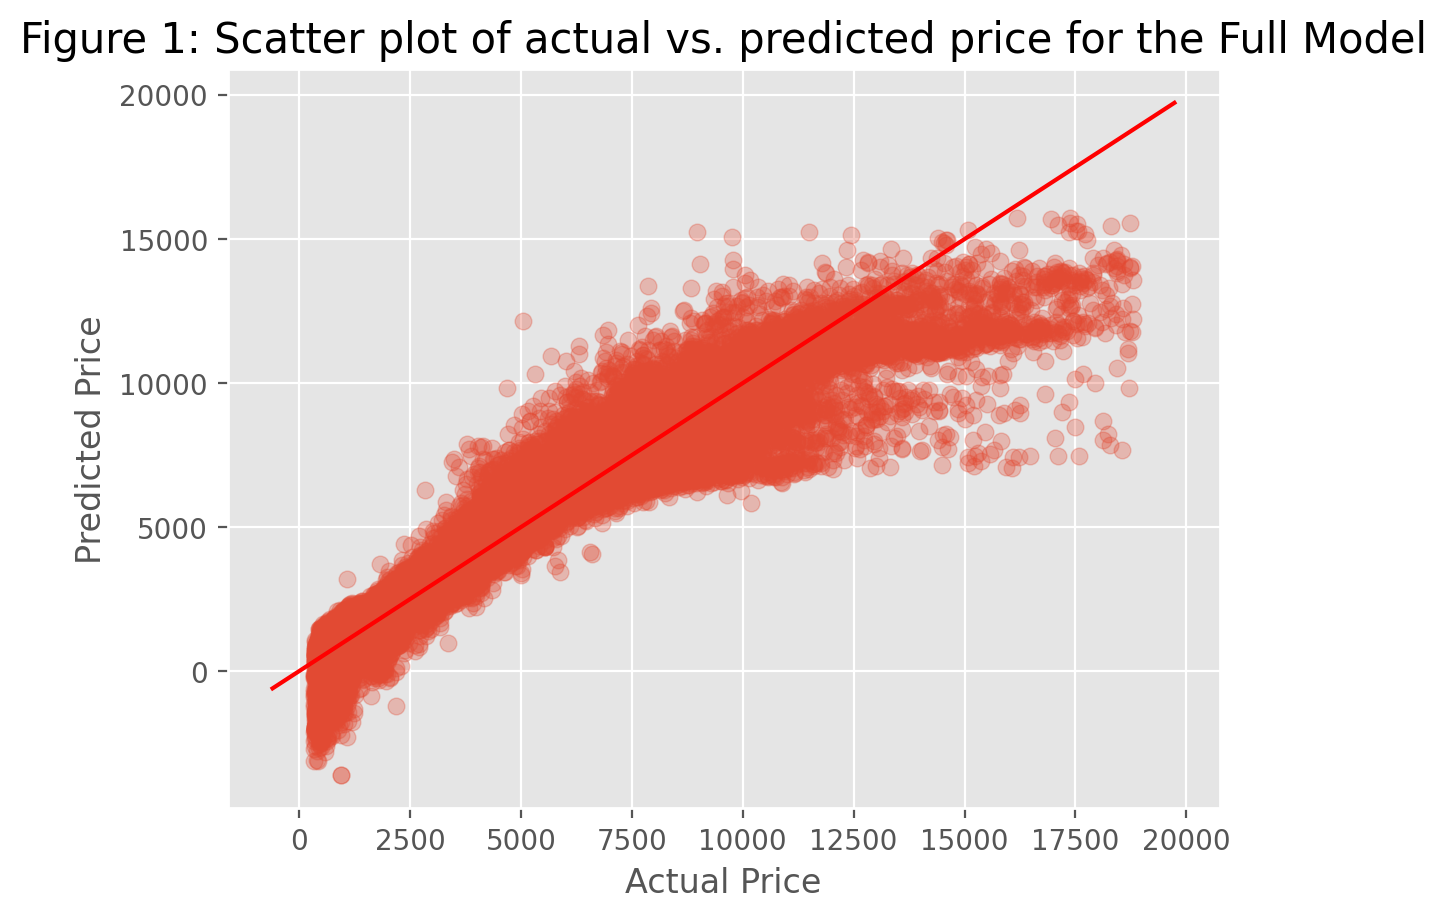

In [31]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

From Figure 1, we observe that the model produces the most accurate results in the price ranges of $1500-$7500. Though after $7500, the actual values begin to deviate slightly from our predicted values.  

We will now check the diagnostics for the full model.

### Full Model Diagnostic Checks<a href="#Full-Model-Diagnostic-Checks" class="anchor-link"></a>

We would like to check whether there are any violations of
the following regression assumptions:

1.  Linearity of the relationship between target variable and the
    independent variables
2.  Constant variance of the errors
3.  Normality of the residual distribution
4.  Statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted `Price`).

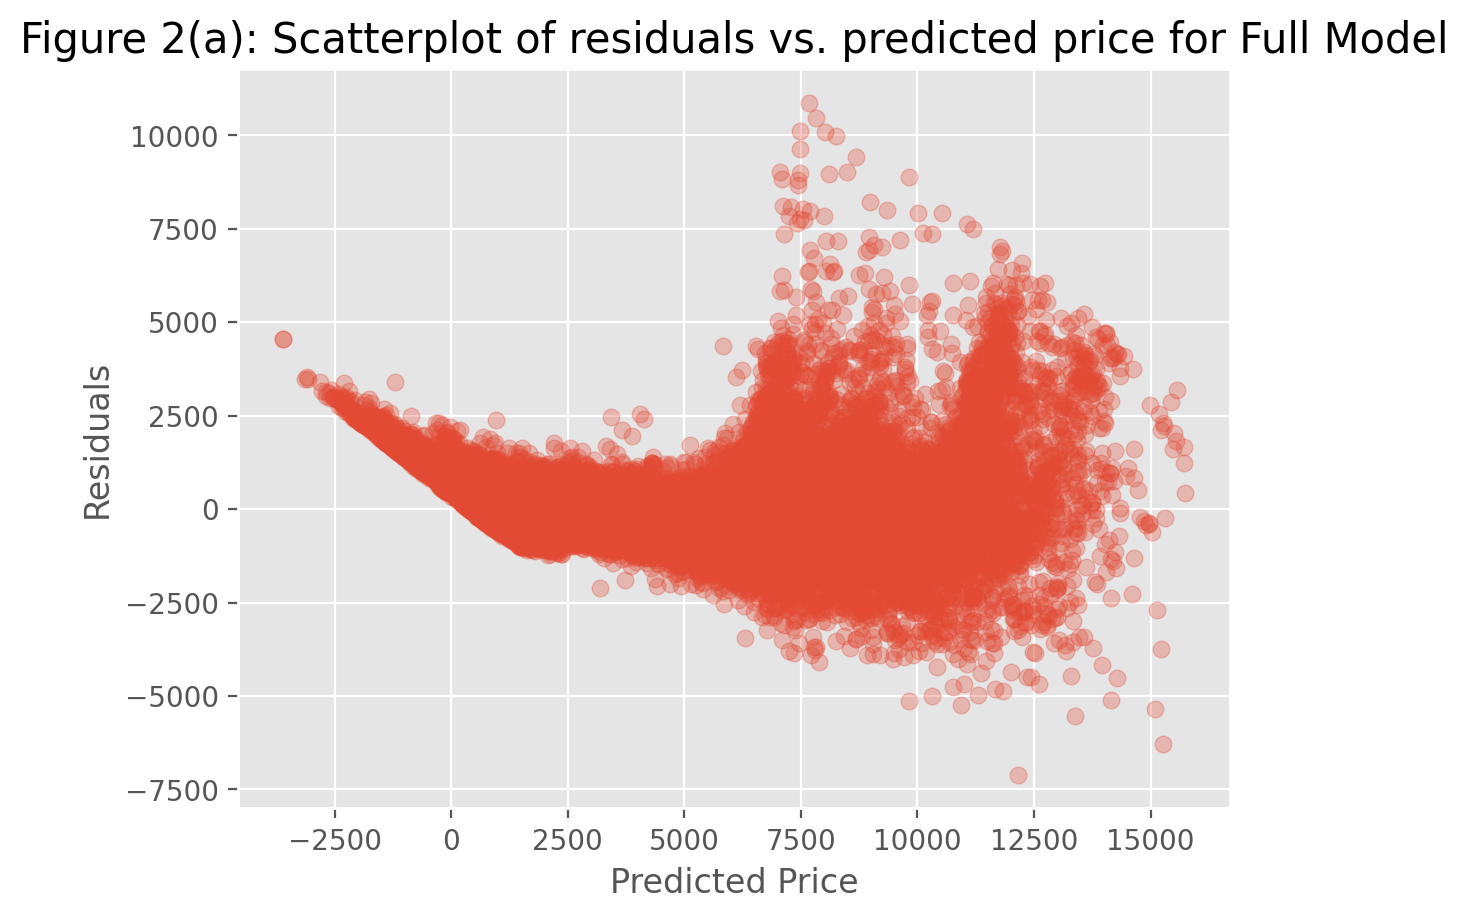

In [32]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

From Figure 2(a), we see that rather than being mostly random and
centered around 0, the residuals show an expanding pattern, especially
when the predicted price is over $7500. This pattern indicates that the constant
variability assumption of linear regression is not quite satisfied in
this case.

Let's now plot the actual price vs. residuals.

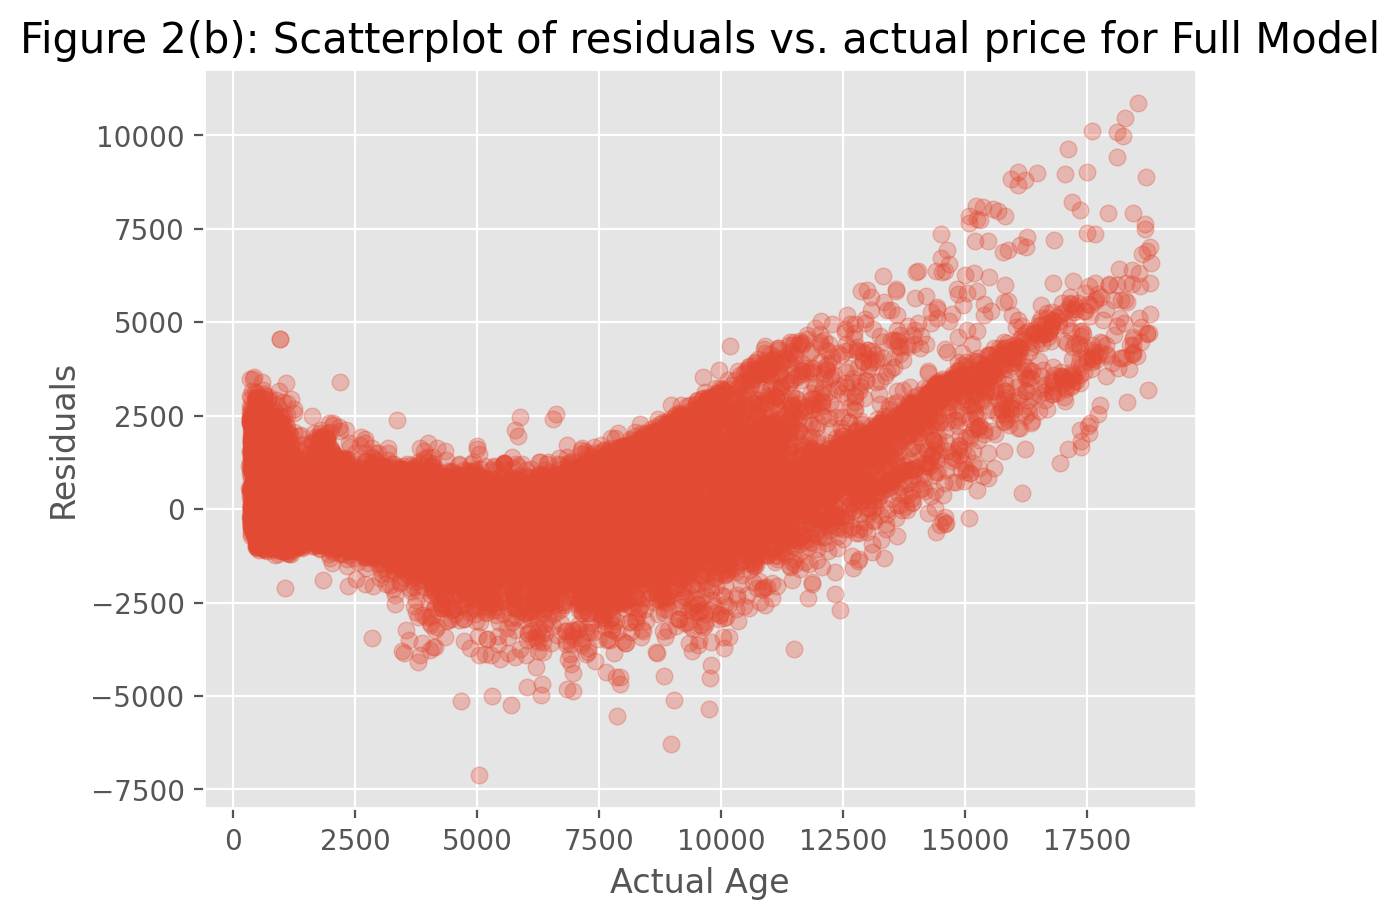

In [33]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

From Figure 2(b), we can see that although it starts as uniformly acceptable, the model starts to deviate after $7500, with residues of up to $2500.

Let's overlay the histograms of actual vs. predicted price on the same plot.

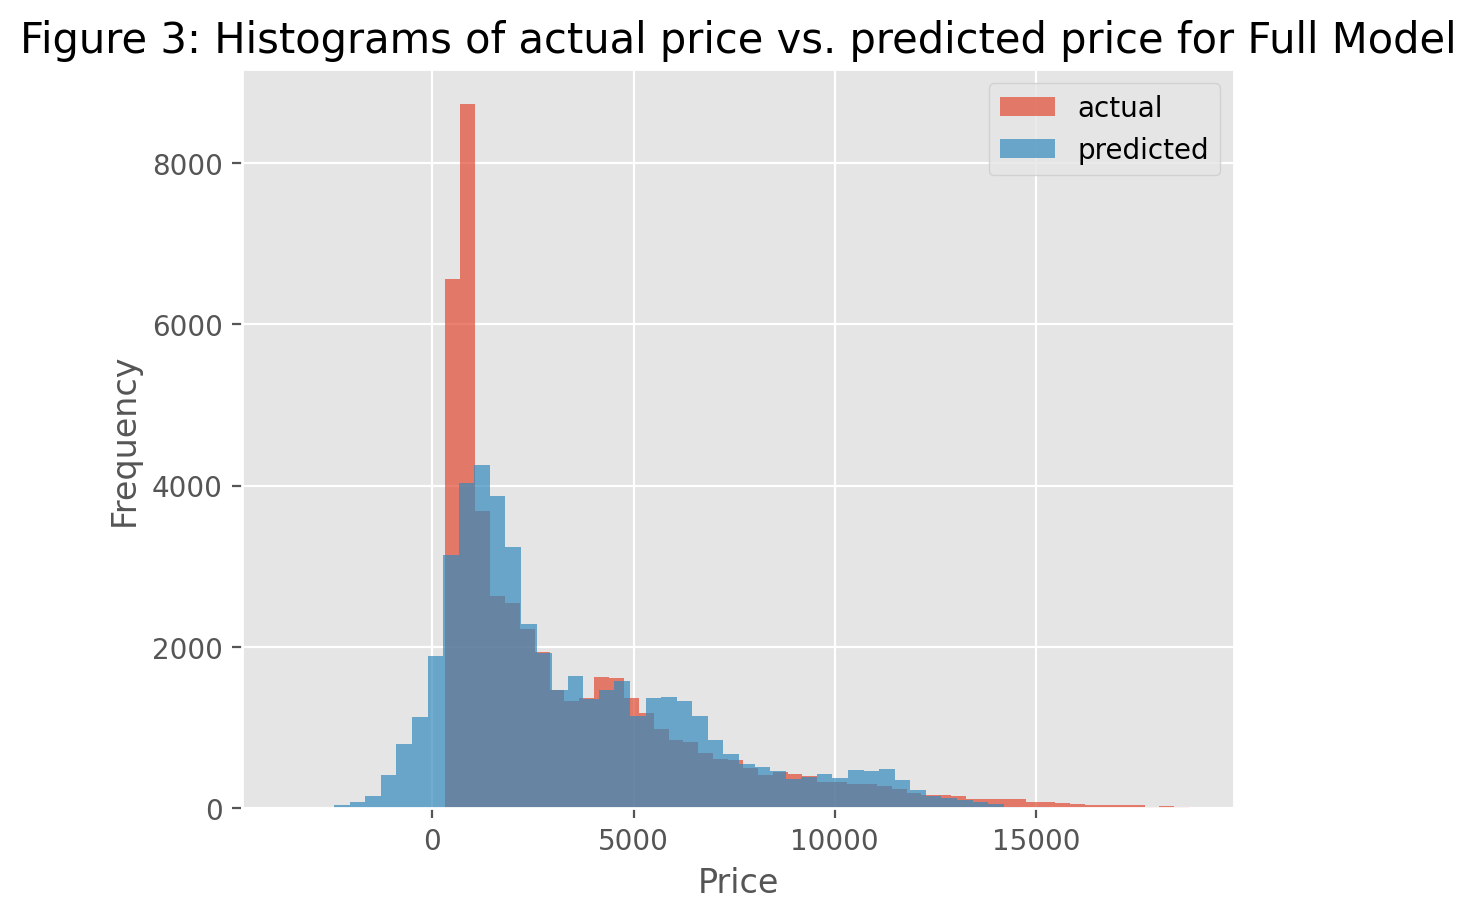

In [34]:
plt.hist(residuals_full['actual'], label='Actual', bins=50, alpha=0.7);
plt.hist(residuals_full['predicted'], label='Predicted', bins=50, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

We notice that in Figure 3, the predicted maximum frequency is 4100 compared to the actual maximum of 8400. This indicates that lower priced diamonds are bought more frequently than our predictions, possibly due to our model creating negative price values which is not possible in the real world. Additionally the predicted prices of diamonds in the $2000 to $4000 range will be more accurate, due to the predicted frequency being similar to the actual frequency.

Let's now have look at the histogram of the residuals.

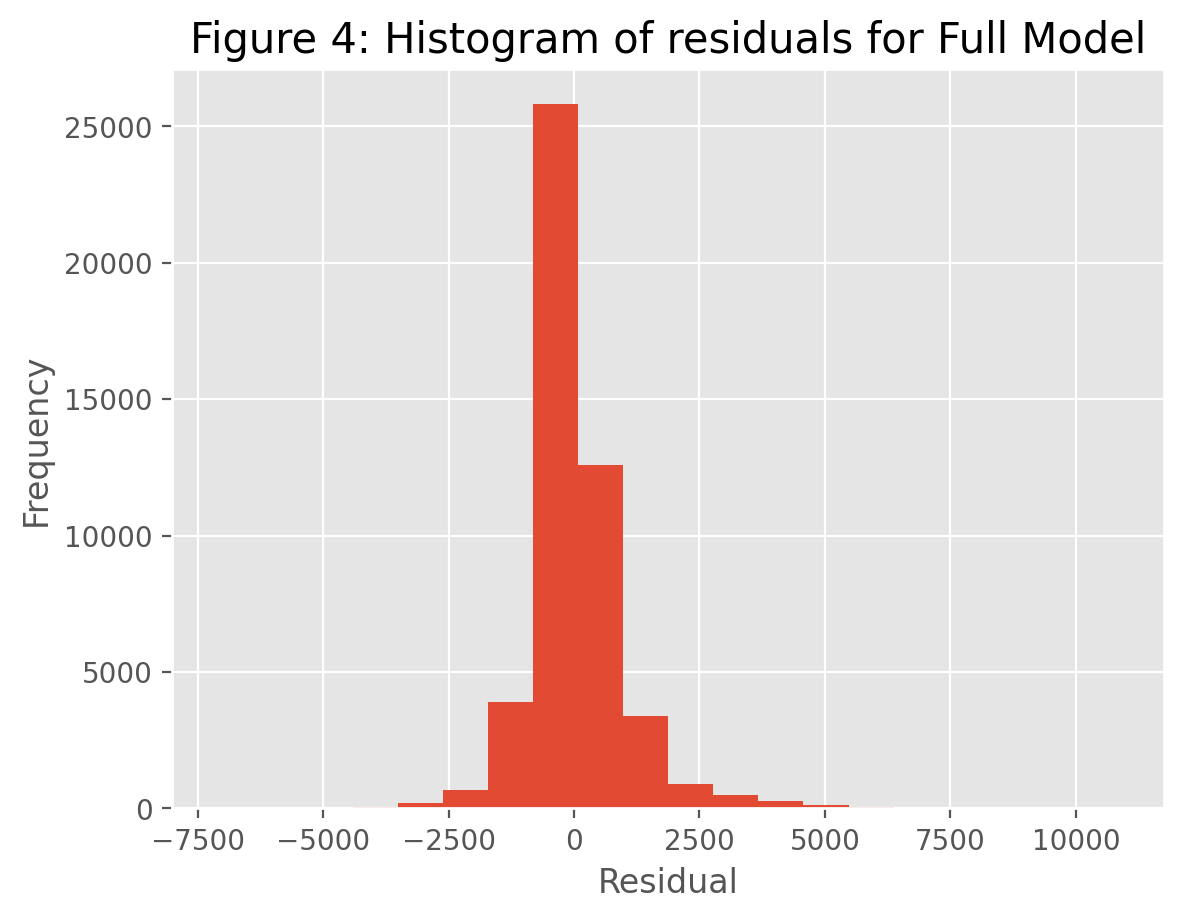

In [35]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

Figure 4 shows that the histogram of residuals is symmetric. The normality assumption of linear regression is not significantly violated, as most of the residuals are around -1000 to 1000.

### Reduced Model Overview

For our reduced model, we will use the following code to remove insignificant features from our model calculation.

In [36]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=label_df).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = label_df).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Depth" with p-value 0.05232

***
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.383e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:53:32   Log-Likelihood:            -4.0220e+05
No. Observations:               48436   AIC:                         8.044e+05
Df Residuals:                   48413   BIC:                         8.047e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

After the reduction, we observe that the R-squared value was reduced from 0.9155 to 0.9154; a very minor change. This indicates that our original model had little to no insignificant features.

Similar to what we did for the full model, let's define a new data frame for actual price vs. predicted price and the residuals for the reduced model.

In [37]:
residuals_reduced = pd.DataFrame({'actual': label_df['Price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.sample(10)

,actual,predicted,residual
48240,2723,2785.559457,-62.559457
27051,756,347.505848,408.494152
20469,10401,10263.384891,137.615109
18022,8305,7088.802215,1216.197785
22838,14445,13435.032189,1009.967811
32179,943,1274.353255,-331.353255
17833,8164,8418.758864,-254.758864
12372,5581,6555.993318,-974.993318
6341,4163,4083.752349,79.247651
13329,5920,6106.387958,-186.387958


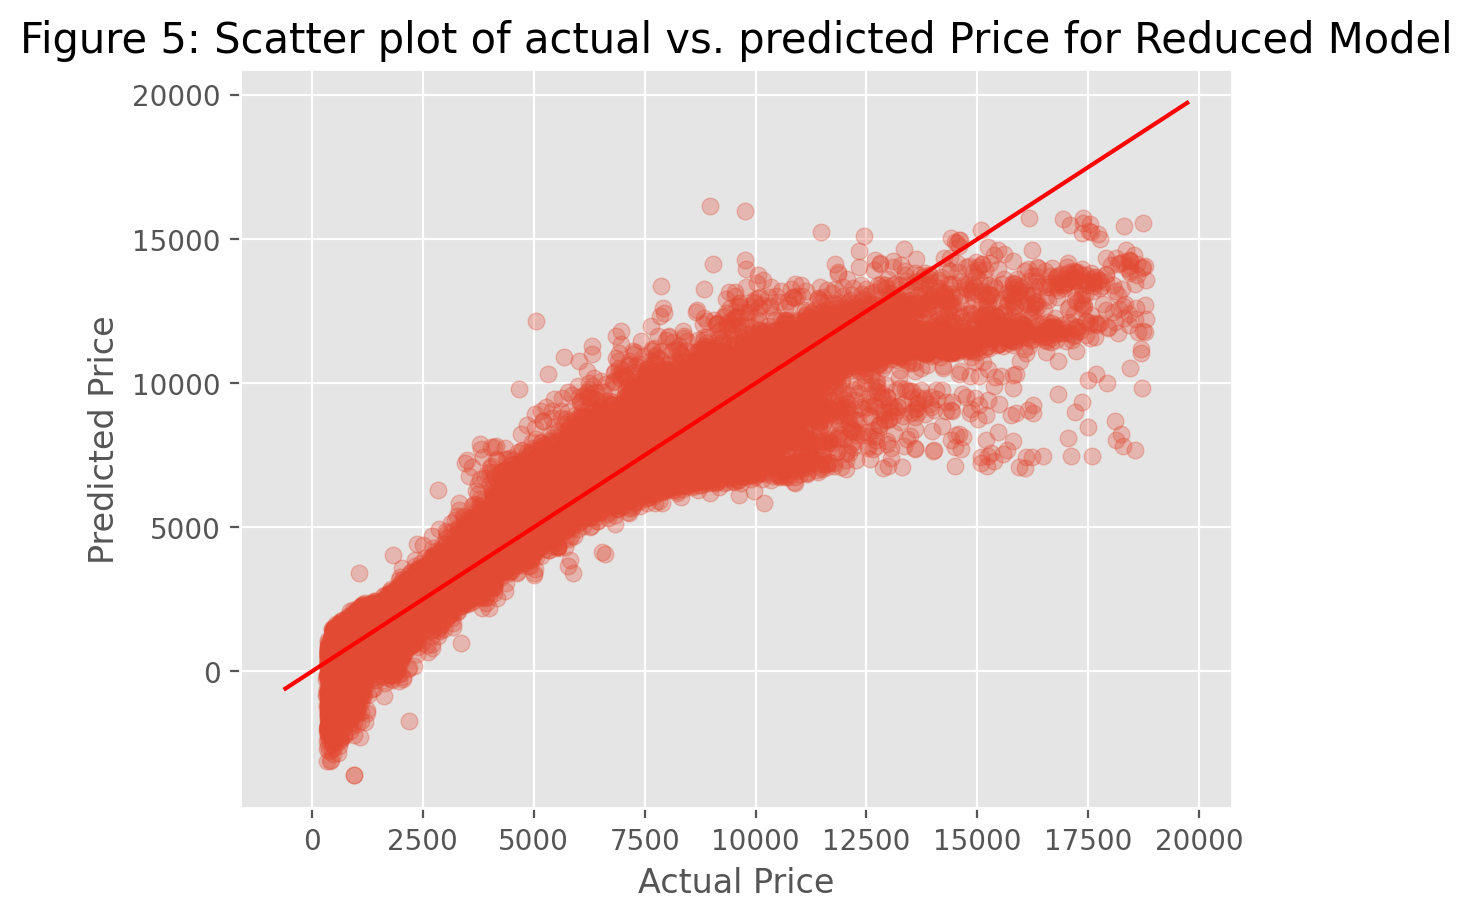

In [38]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 5: Scatter plot of actual vs. predicted Price for Reduced Model', fontsize=15);
plt.show(); 

As expected of the small change, Figure 5 shows almost identical results to the full model, and will need to be diagnostic-checked.

### Reduced Model Diagnostic Checks

We will check whether there are any indications of violations of our regression assumptions for the reduced model.

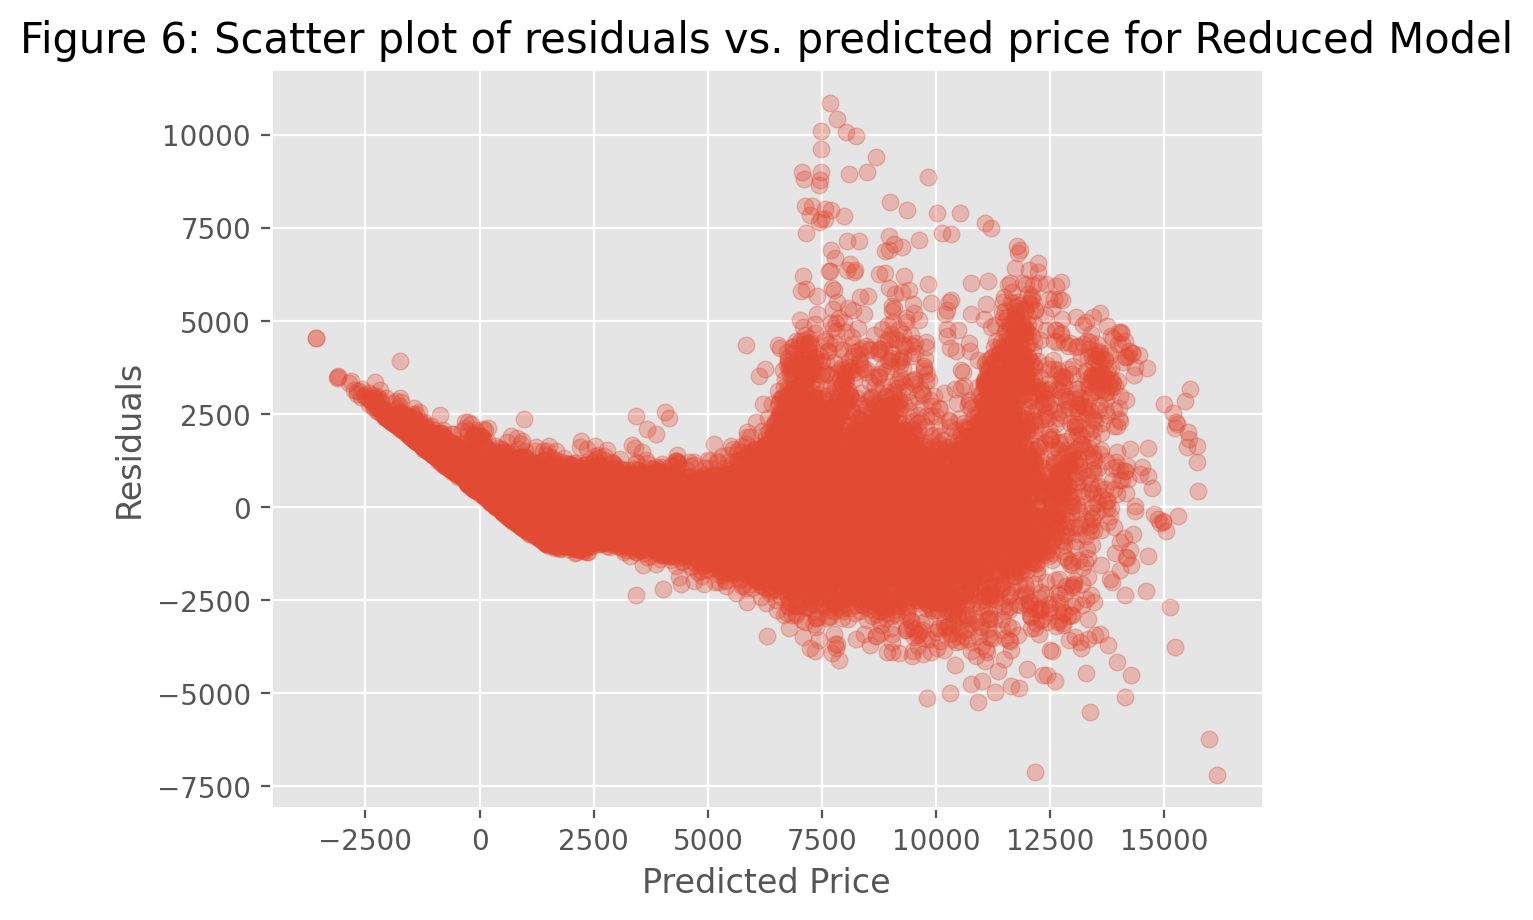

In [39]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter plot of residuals vs. predicted price for Reduced Model', fontsize=15)
plt.show();

Similar to Figure 2(a), Figure 6 shows a vast spread, indicating residual impact. Thus our model also becomes unrelievable after $7500, similar to the unreliability at the same price in Figure 2(a).

Now lets take a look at the histogram to see the distribution of residues for the reduced model.

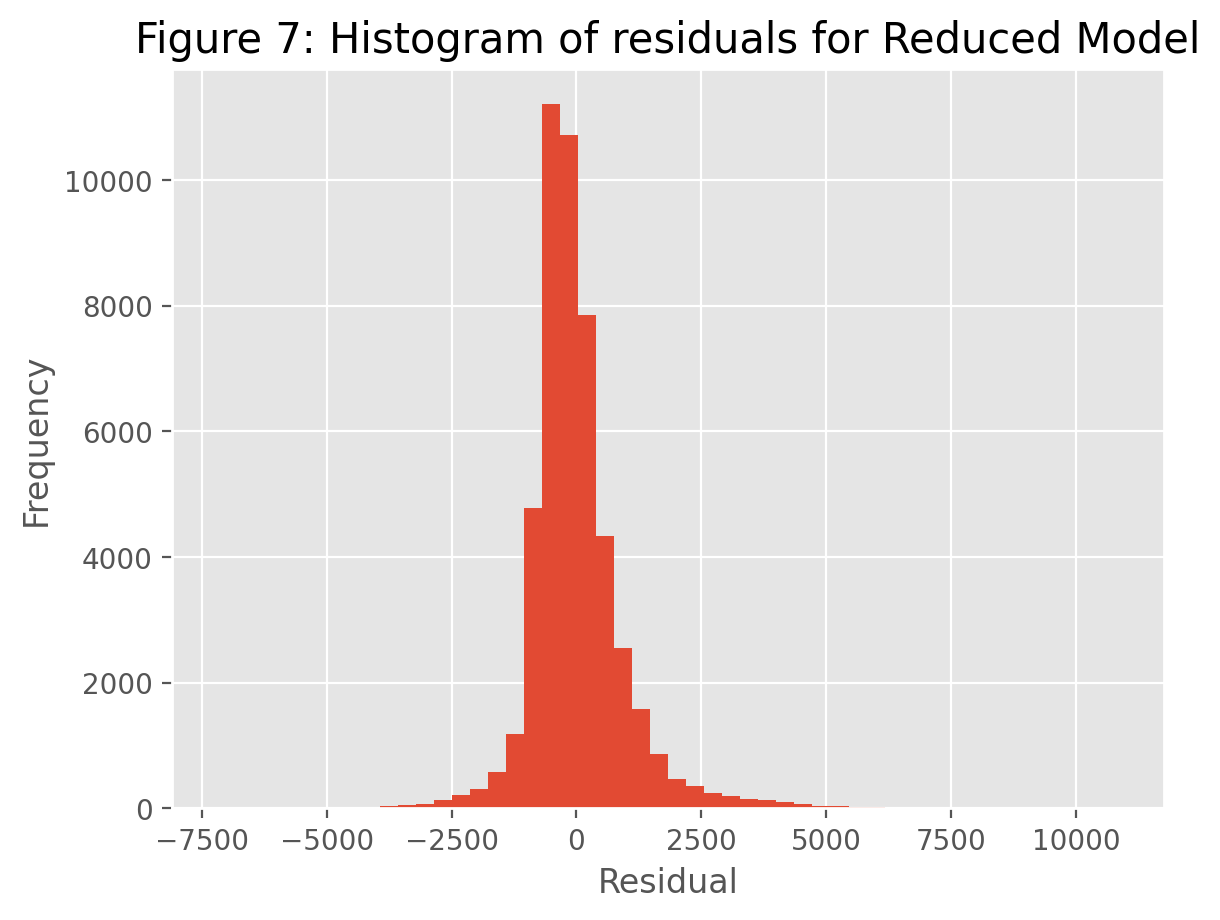

In [40]:
plt.hist(residuals_reduced['residual'], bins = 50);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 7 we can observe that the residual spread is centered around 0 and around -2000 to 2000. Indicating that it is normally distributed.

## Critique & Limitations <a id='cl'></a>

### Critique & Limitations of the approach: strengths and weaknesses in detail.
#### Strength
Through our approach to modelling the full model, we assign numerical values to the features of a diamond so that any future data that is similar to our original dataset can be accurately used to predict the price of a diamond below $7500 based on its features.
#### Weakness
After modelling, we found that despite the relation R squared value being 91%, the residuals started to become more varied on predictions made on the upper end of prices. This may be due to the lack of varied and impactful features in relation to the price.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

Initially, we had a dataset providing multiple features of diamonds and their correlating prices. Our goal was to find and demonstrate the relationship between the features and price of a diamond. In doing so, we aim to identify the core features of a diamond that will affect its price. To get more accurate data, we processed the dataset and removed all outlying records. After creating the graphs, we discussed and concluded which features were most significant to a diamond's price.

This report uses a modified dataset of the original to create a statistical model, under the assumption that the dataset is linearly related, or that it followed MLR (Multiple Linear Regression). We decided to use the OLS (Ordinary Least Squares) model for fitting. By doing this, we acquired a new dataset which contains the predictions of the price a diamond as well as finding the residues for each record. Finally, we reviewed our findings, and made the conclusion to the project.

### Summary of Findings

From Phase 1, we found that all the variables had different characteristics and all affected the price of a diamond. Namely, Carat (known formally as diamond-class-weight) had the biggest impact. Table, Cut and Clarity were moderately responsible; and Color had almost no change to the pricing.

In Phase 2 we used the data and knowledge from Phase 1 to create a statistical model. Optimising our features to be usable in the modules allowed us to retrieve the relative data, such as the residual plot which assisted us in representing the findings of the full model. Although our OLS model returned a value of R squared of 0.91, our predictions have been rather erratic. The predictions were accurate up to $10000, however, after $10000, the actual data was very inconsistant, and our model was unable to follow the prices. The residual spread of cheaper diamonds were expected and normal, however diamonds that were more expensive had a very unstable residual spread. This could potentially indicate that diamonds that cost more than $10000 might have another variable that can influence their price besides the ones from our dataset.

### Conclusions

Phase 1 of our project was very successful. Clear relationships were established between features and the price, and the data was adequately filtered and prepared in order to create graphs. Our graphs that predicted data was similar to the actual data as well, showing clear consistency between the price.

The second phase however, was rather unsatisfactory. Although our model was accurate in describing the cheaper diamonds, it struggled on expressing more expensive diamonds. Comparing our predictions and the actual data, we found that there were many anomalies that wouldn't be possible to accurately model with our current dataset. 

In follow-up/future investigations; different model types, focus on other variables of diamonds, and more data could produce more successfull results.